##Customer Spend Behavioral Analytics - Use Case 5

**Problem statement:**

Identify the spend behavior of the customers in the dataset and bring out spend insights based on age and gender.

**About Dataset**

The data presents customer details for Gender, Age, Annual Income and Spending Score.
- The Genre column represents Gender
- Annual Income column is in the unit of thousand Dollars.
- The spending score can be between 0 to 100.


Submitted By: Sharan Sasi

Email: sharanssi@gmail.com

### Importing libraries

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Library to do clustering
from sklearn.cluster import KMeans


### Import Dataset

In [5]:
data = pd.read_csv("Mall_Customers.csv")
print("###### Customer dataset has {} rows and {} columns #######".format(data.shape[0], data.shape[1]))
data.head()

###### Customer dataset has 200 rows and 5 columns #######


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

### Check the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking for missing values in the data
data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

No missing data

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

In [10]:
# dropping customer id as it is a reduntant data
data = data.drop(["CustomerID"], axis=1)

No duplicates in the dataset

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [13]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Genre,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_Income_(k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending_Score,200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


Observation:
- No of data points for female is more than male
- Average age is around 40, with minimum age of 18 and max age of 70
- Average annual income is 60k
- Average spending score is 50

**Let's check the count of each unique category in each of the categorical variables.**

In [14]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Female    112
Male       88
Name: Genre, dtype: int64
--------------------------------------------------


### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Age

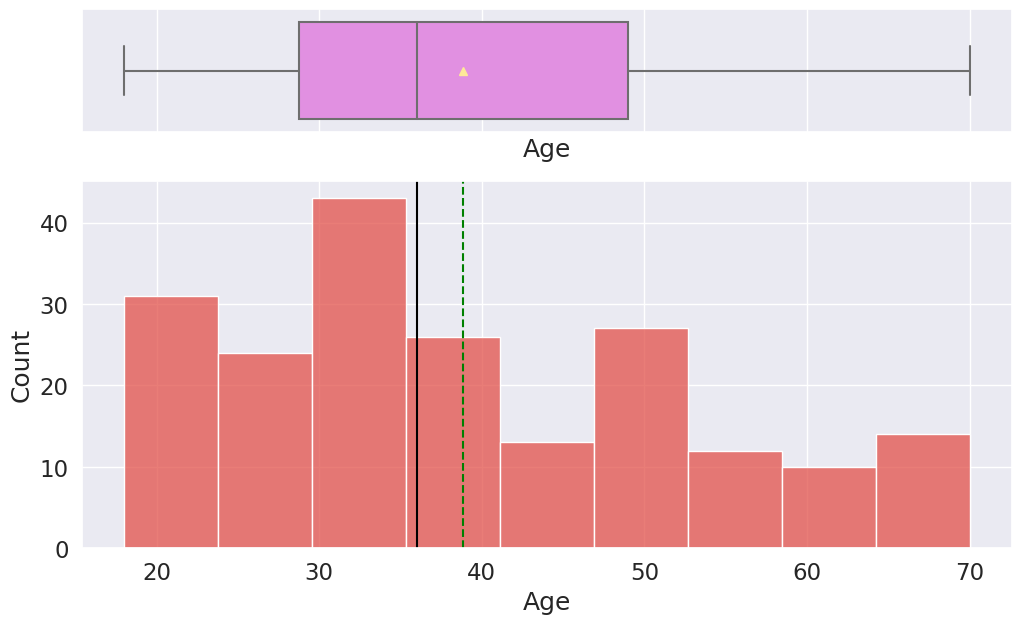

In [16]:
histogram_boxplot(data, "Age")

Observation: We have mean age towards 40, more people in 20-40 age bracket

Let's create age bucket for better group for analysis

In [17]:
bins = [18, 29, 39, 49, 59, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-70']
data['agerange'] = pd.cut(data.Age, bins, labels = labels,include_lowest = True)
data.head(10)

,Genre,Age,Annual_Income_(k$),Spending_Score,agerange
0,Male,19,15,39,18-29
1,Male,21,15,81,18-29
2,Female,20,16,6,18-29
3,Female,23,16,77,18-29
4,Female,31,17,40,30-39
5,Female,22,17,76,18-29
6,Female,35,18,6,30-39
7,Female,23,18,94,18-29
8,Male,64,19,3,60-70
9,Female,30,19,72,30-39


### Annual Income

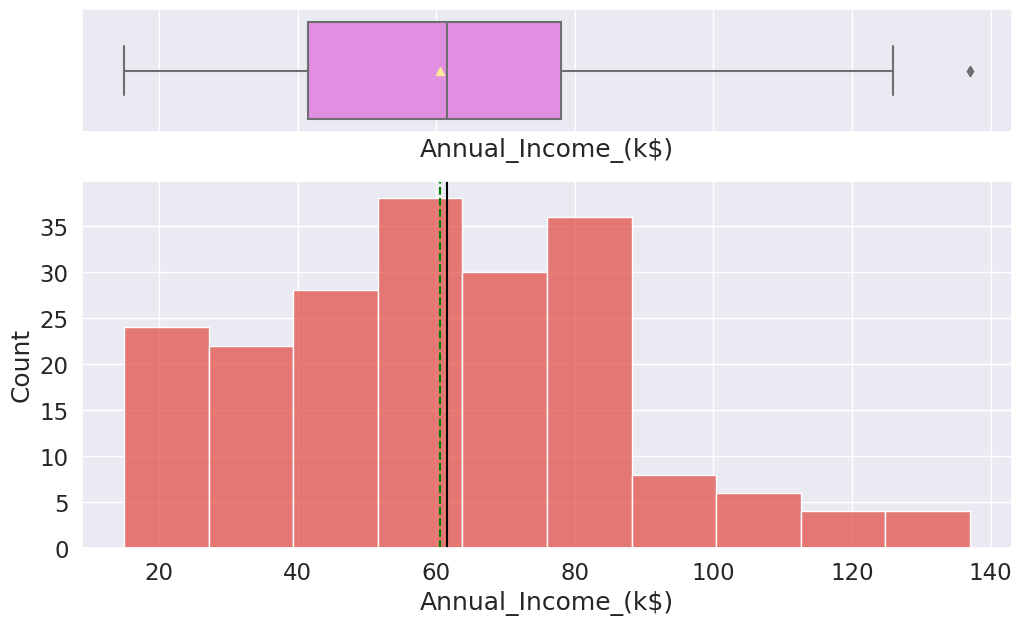

In [18]:
histogram_boxplot(data, "Annual_Income_(k$)")

Observation: Average annual income is around 60k, more number of people earning in the income bracket of 50-90k

### Spending Score

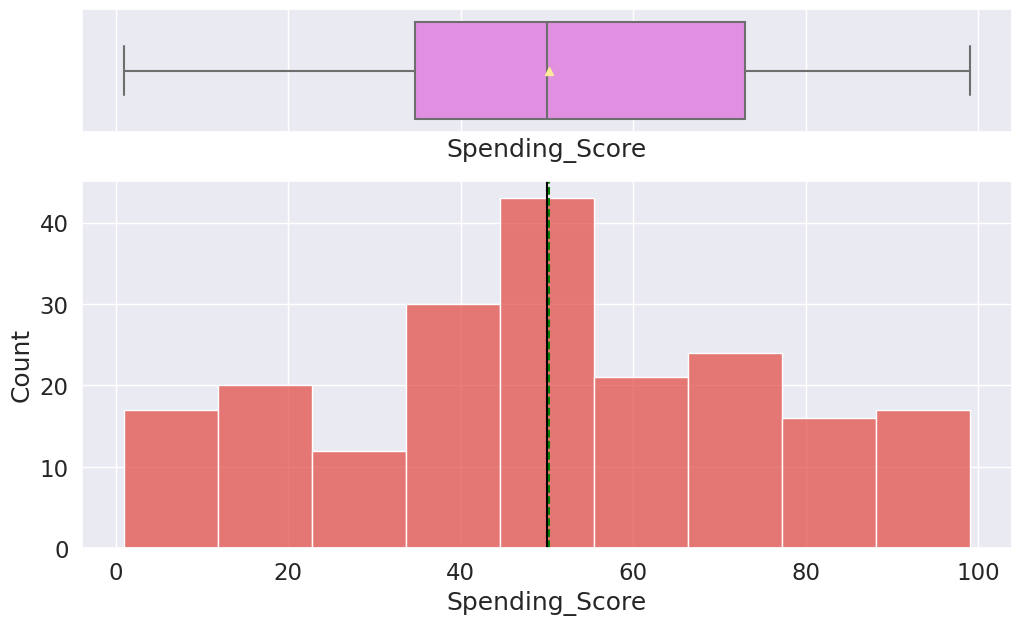

In [19]:
histogram_boxplot(data, "Spending_Score")

Observation: Mean spending score is around 50

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Gender

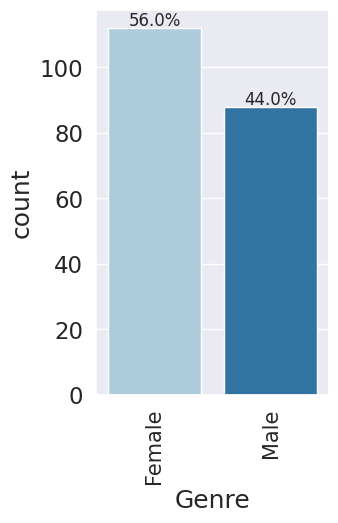

In [21]:
labeled_barplot(data, "Genre", perc=True)

Observation: We have more female representation that Male 


*   Probably the female representation is higher because it's a shopping mall customer data, there might be more women shopping than men


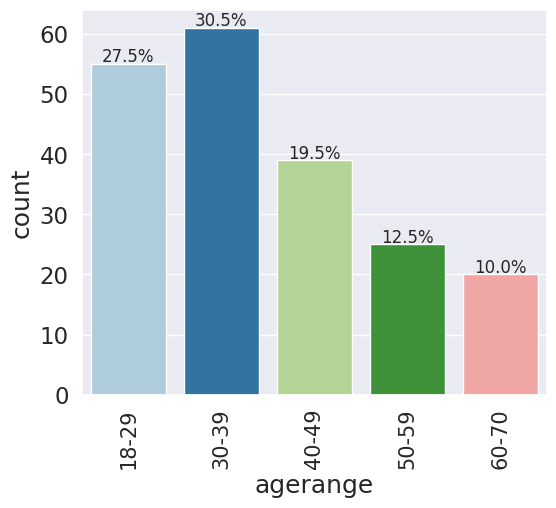

In [22]:
labeled_barplot(data, "agerange", perc=True)

Most observation belongs to 30-39 range

### Bivariate Analysis

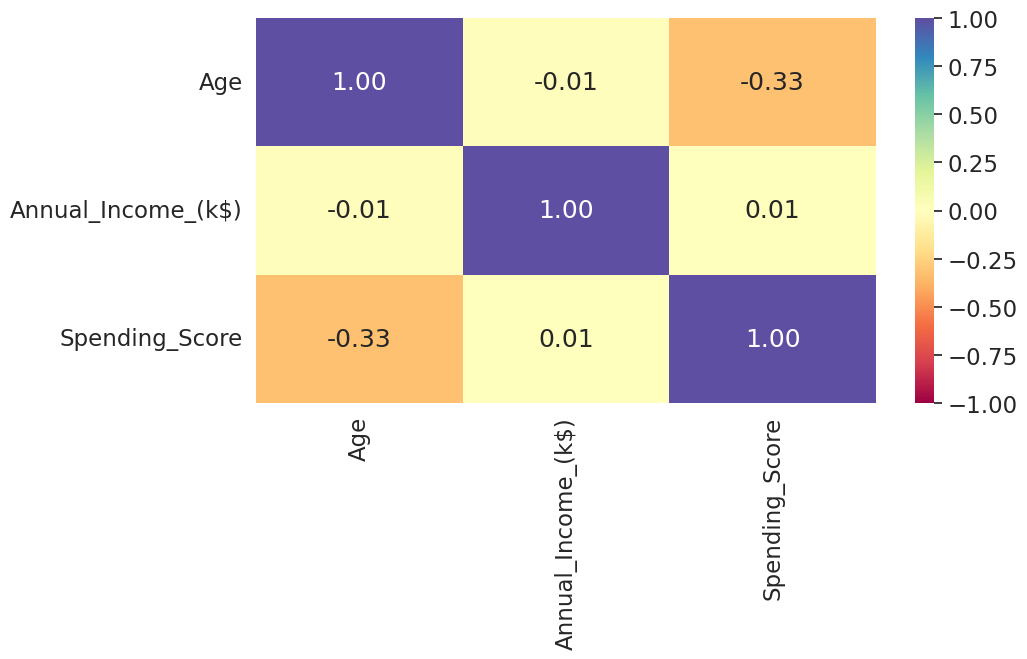

In [23]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation: No correlation among variables

#### Let's check the relationship between numerical variables

**Annual income vs spending score**

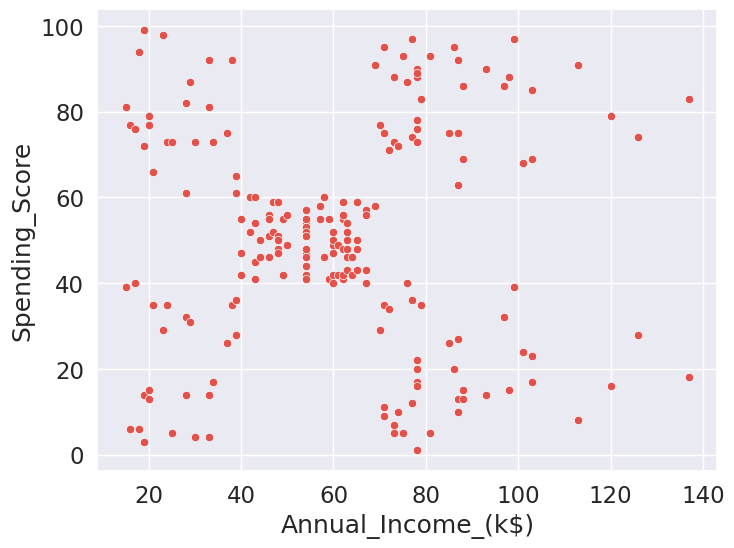

In [24]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data['Annual_Income_(k$)'], y=data.Spending_Score)
plt.show()

Observation: Spending score is not directly proportional to annual income

Age range vs income

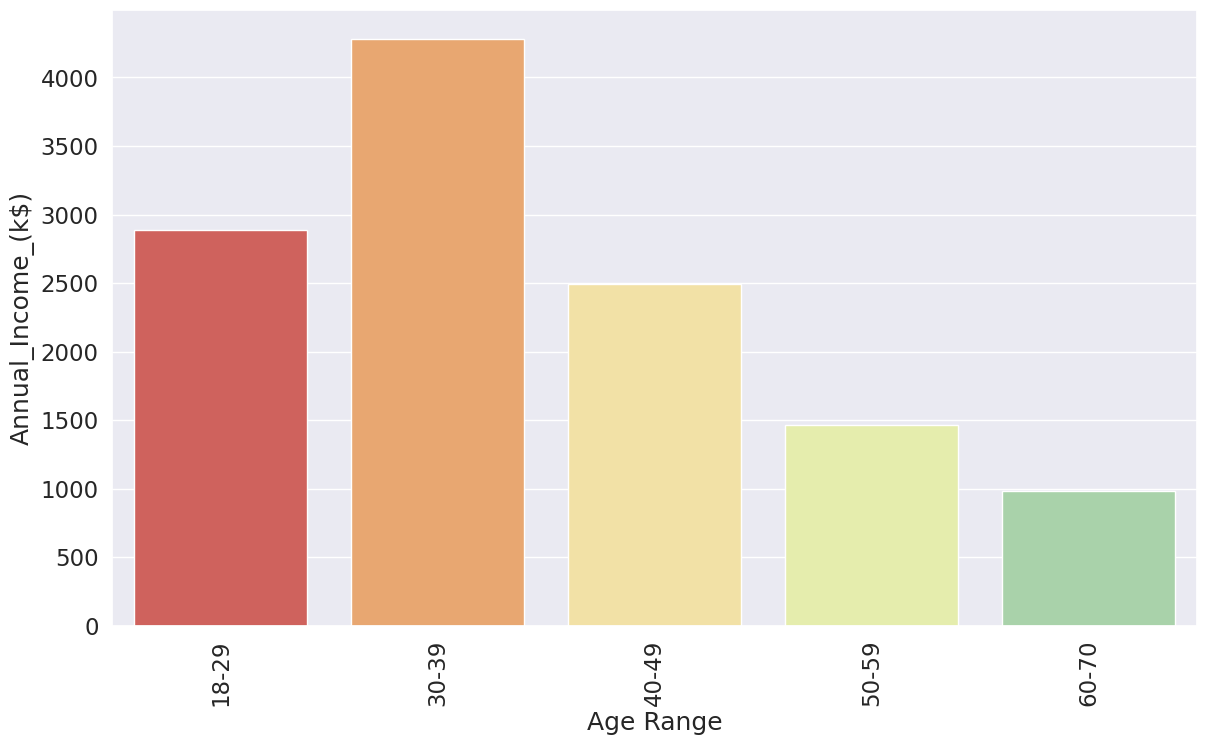

In [25]:
df_revenue1 = data.groupby(["agerange"], as_index=False)[
    "Annual_Income_(k$)"
].sum()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.agerange, y=df_revenue1['Annual_Income_(k$)'])
a.set_xlabel("Age Range")
a.set_ylabel("Annual_Income_(k$)")
plt.show()

Observation: People in the age range from 18-40 is earning more, this is maybe due to more people in this dataset is from this age-bracket

Now, lets check the mean income of each age-group

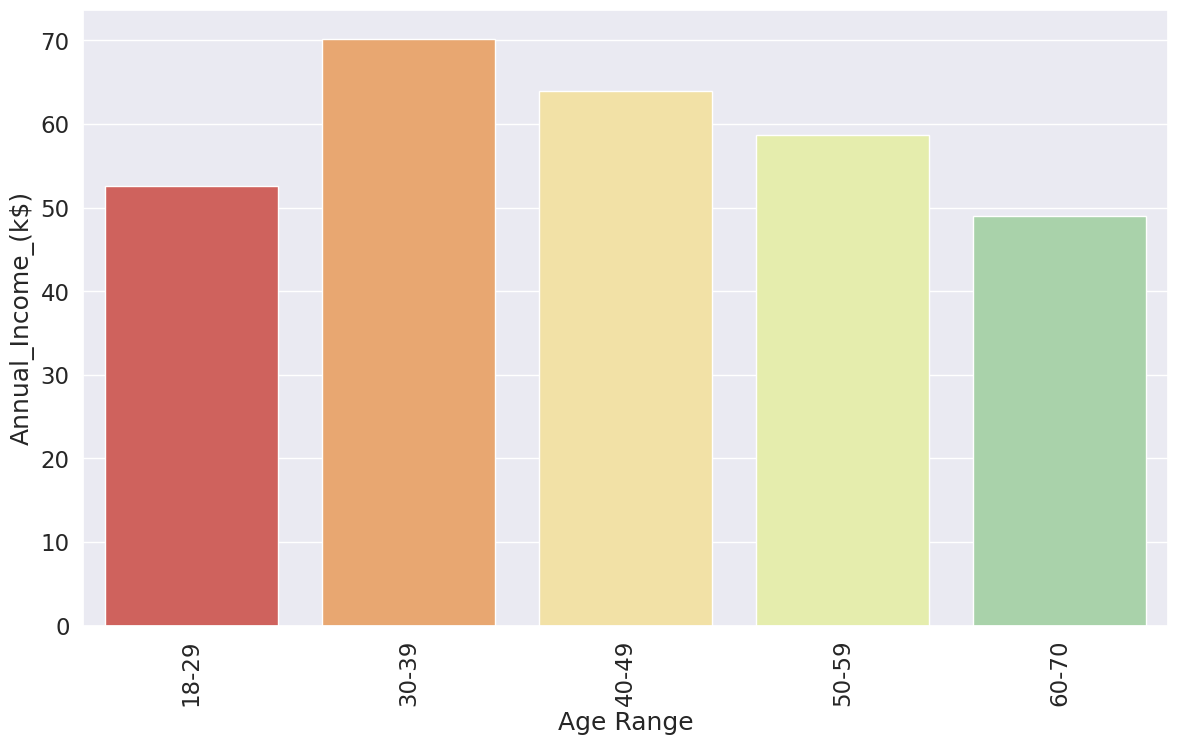

In [26]:
df_revenue1 = data.groupby(["agerange"], as_index=False)[
    "Annual_Income_(k$)"
].mean()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.agerange, y=df_revenue1['Annual_Income_(k$)'])
a.set_xlabel("Age Range")
a.set_ylabel("Annual_Income_(k$)")
plt.show()

Observation:


*   Mean income of age group 30-40 is the highest
*   then, followed by 40-50 age group   



Age group wise spending score

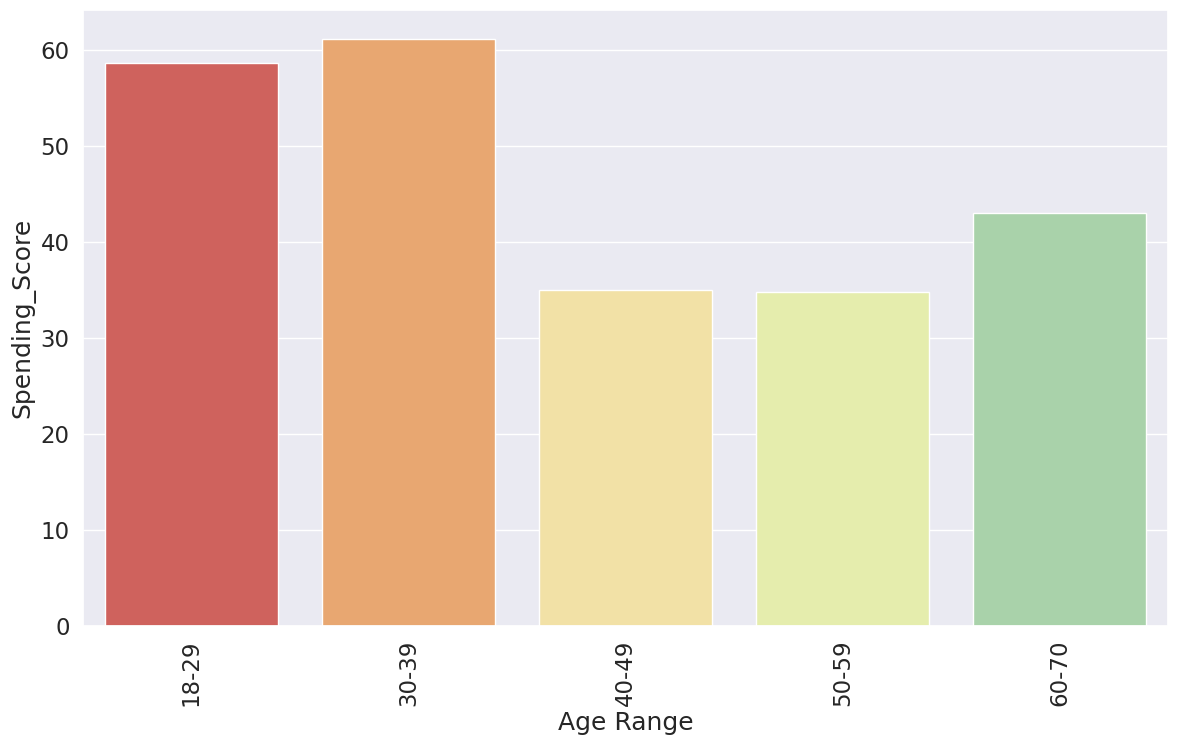

In [27]:
df_revenue1 = data.groupby(["agerange"], as_index=False)[
    "Spending_Score"
].mean()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.agerange, y=df_revenue1['Spending_Score'])
a.set_xlabel("Age Range")
a.set_ylabel("Spending_Score")
plt.show()

Observation:


*   Younger people spend more 
*   Age-group 18-40 is the highest spenders



Let's check gender wise income

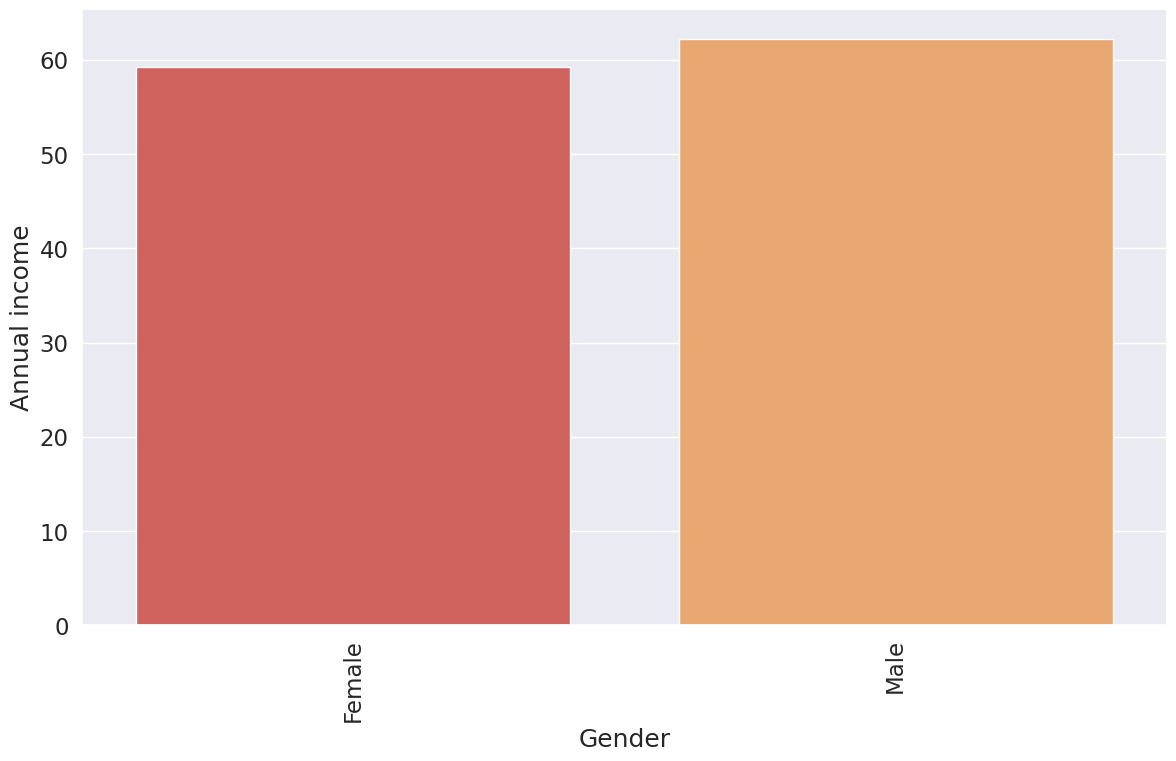

In [28]:
df_revenue1 = data.groupby(["Genre"], as_index=False)[
    "Annual_Income_(k$)"
].mean()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.Genre, y=df_revenue1['Annual_Income_(k$)'])
a.set_xlabel("Gender")
a.set_ylabel("Annual income")
plt.show()

Observation: Even if we have more female data points, the average income of male is higher than female

Lets check gender wise spending score

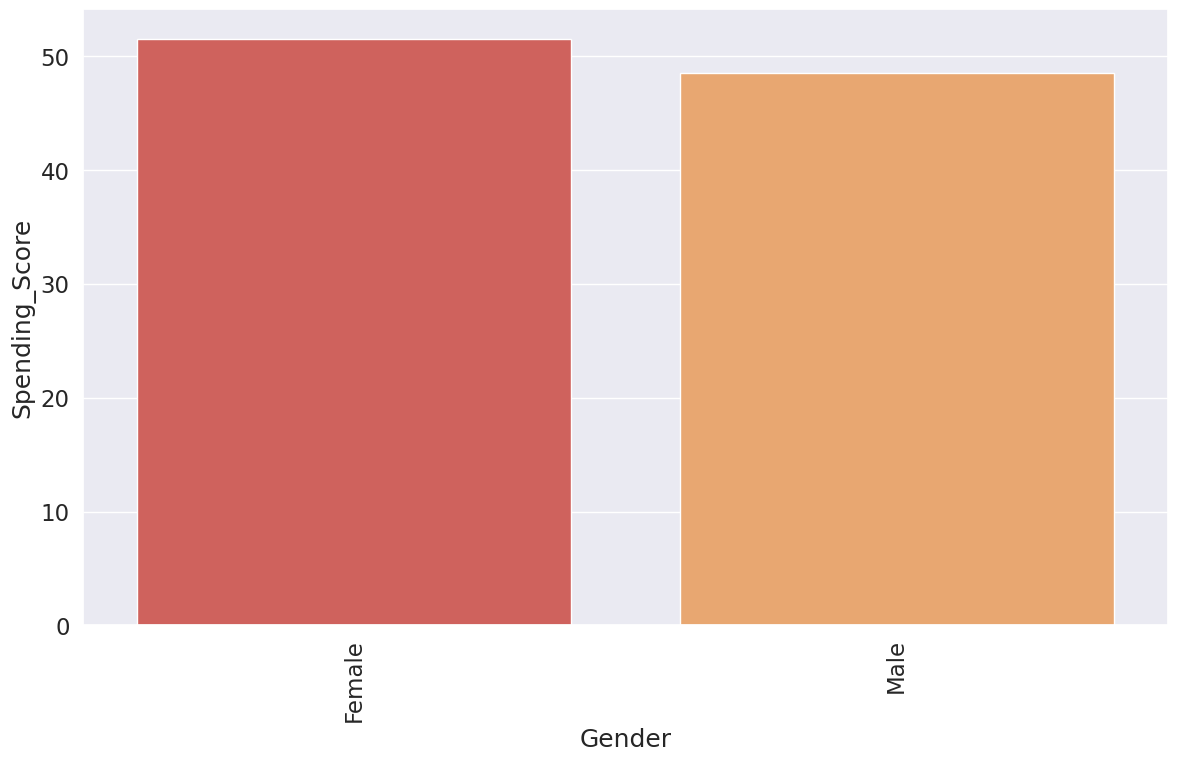

In [29]:
df_revenue1 = data.groupby(["Genre"], as_index=False)[
    "Spending_Score"
].mean()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.Genre, y=df_revenue1['Spending_Score'])
a.set_xlabel("Gender")
a.set_ylabel("Spending_Score")
plt.show()

Observation: Average spending score of female is higher which means female spends more in the shopping mall than male

### Let's check income distribution of male and female seperately

Female

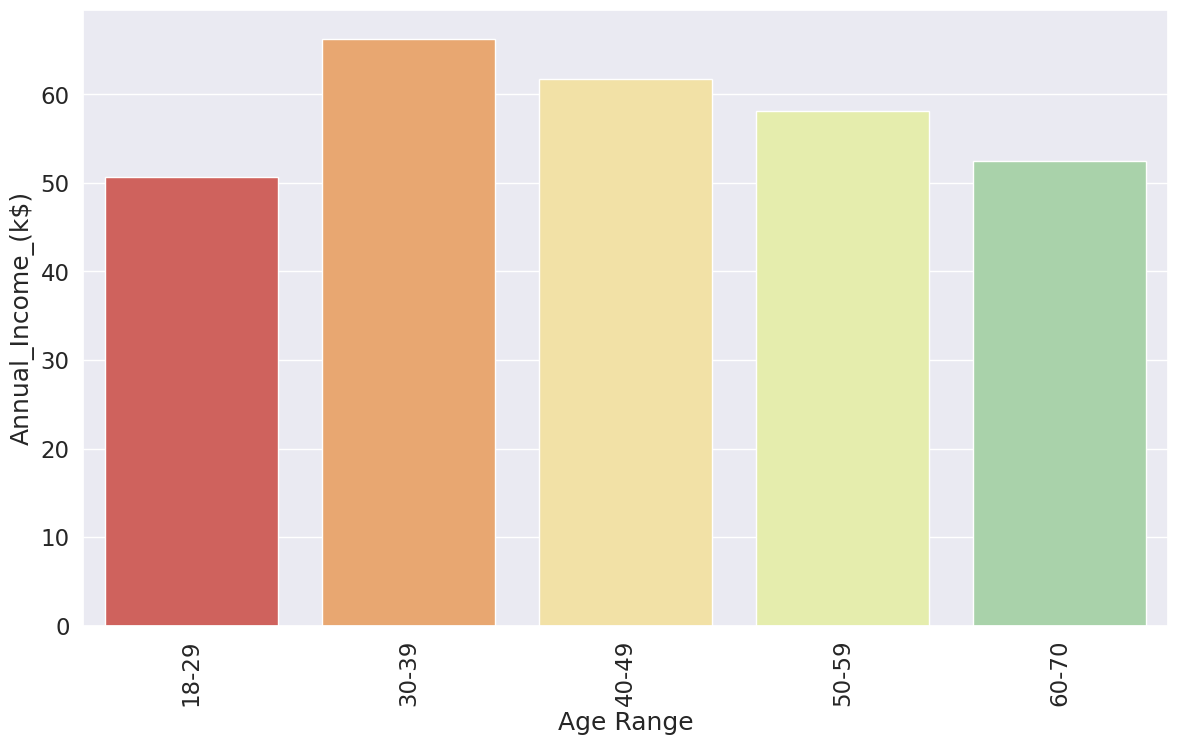

In [31]:
df_revenue1 = data[data['Genre']=='Female'].groupby(["agerange"], as_index=False)[
    "Annual_Income_(k$)"
].mean()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.agerange, y=df_revenue1['Annual_Income_(k$)'])
a.set_xlabel("Age Range")
a.set_ylabel("Annual_Income_(k$)")
plt.show()

Observation: Female age range 30-50 has average income more than other age groups

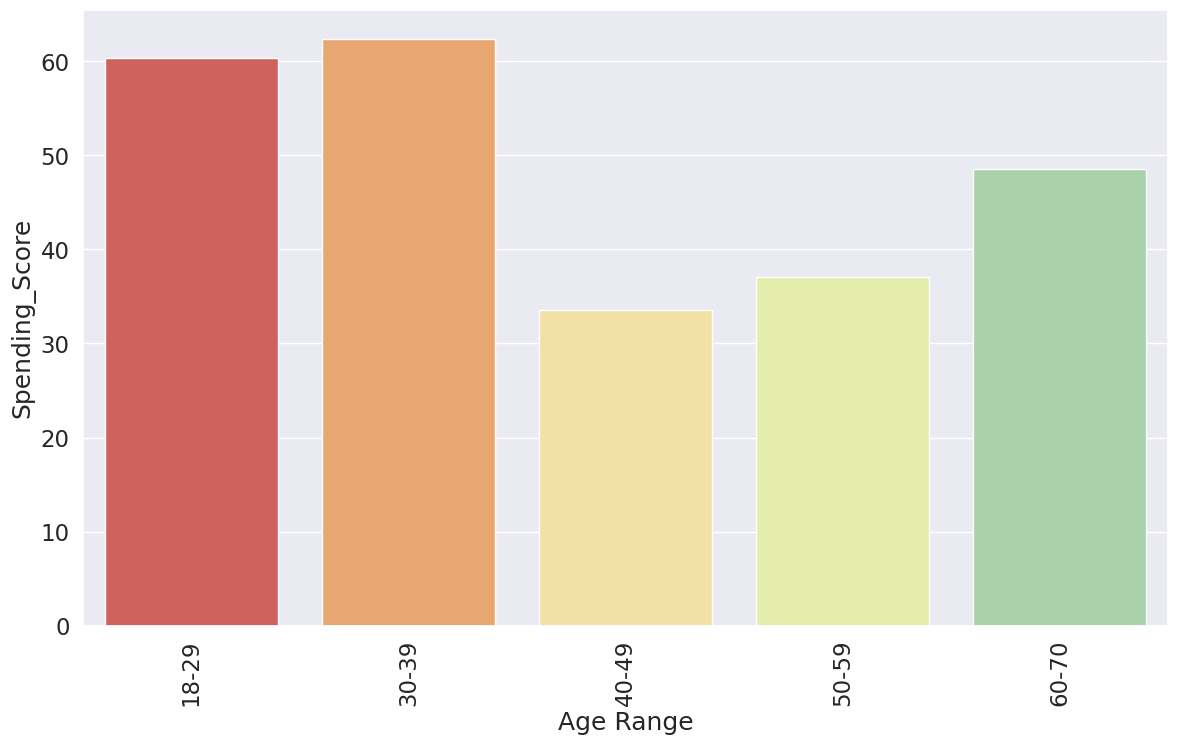

In [32]:
df_revenue1 = data[data['Genre']=='Female'].groupby(["agerange"], as_index=False)[
    "Spending_Score"
].mean()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.agerange, y=df_revenue1['Spending_Score'])
a.set_xlabel("Age Range")
a.set_ylabel("Spending_Score")
plt.show()

Observation: Female age range 20-40 has higher spending score than other age groups. So younger women spends more than older women

Male

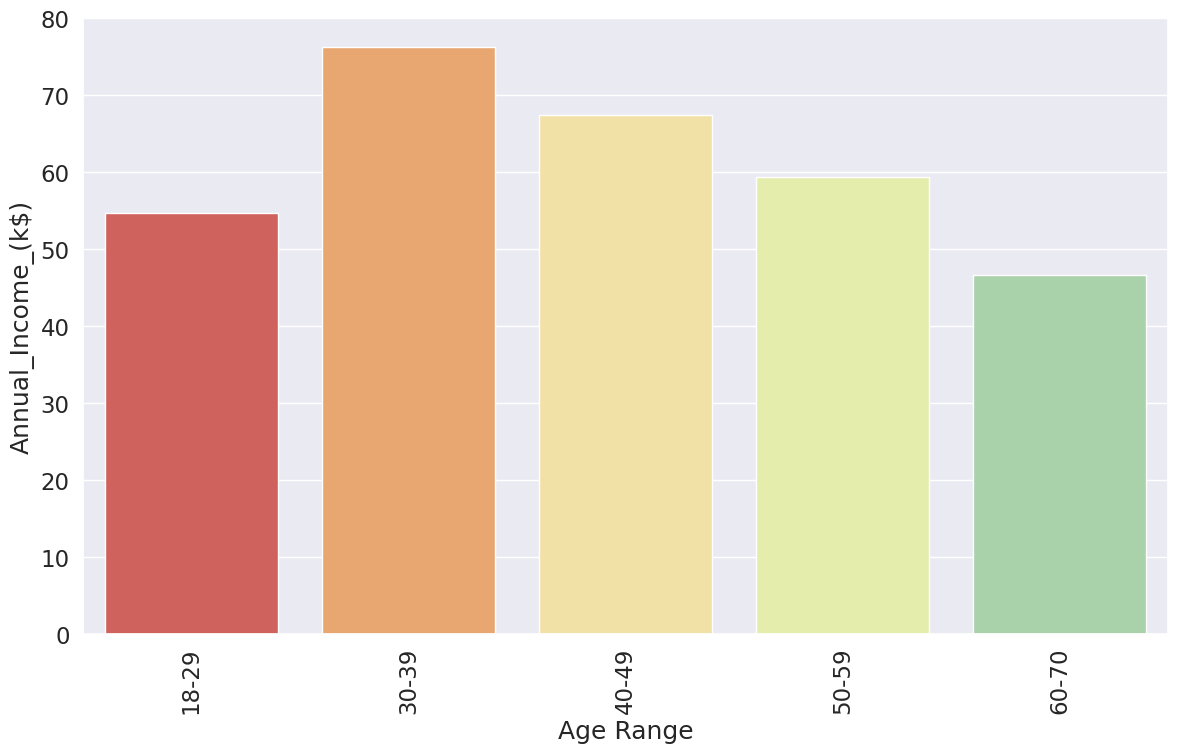

In [33]:
df_revenue1 = data[data['Genre']=='Male'].groupby(["agerange"], as_index=False)[
    "Annual_Income_(k$)"
].mean()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.agerange, y=df_revenue1['Annual_Income_(k$)'])
a.set_xlabel("Age Range")
a.set_ylabel("Annual_Income_(k$)")
plt.show()

Observation: Male age range 30-50 has average income more than other age groups

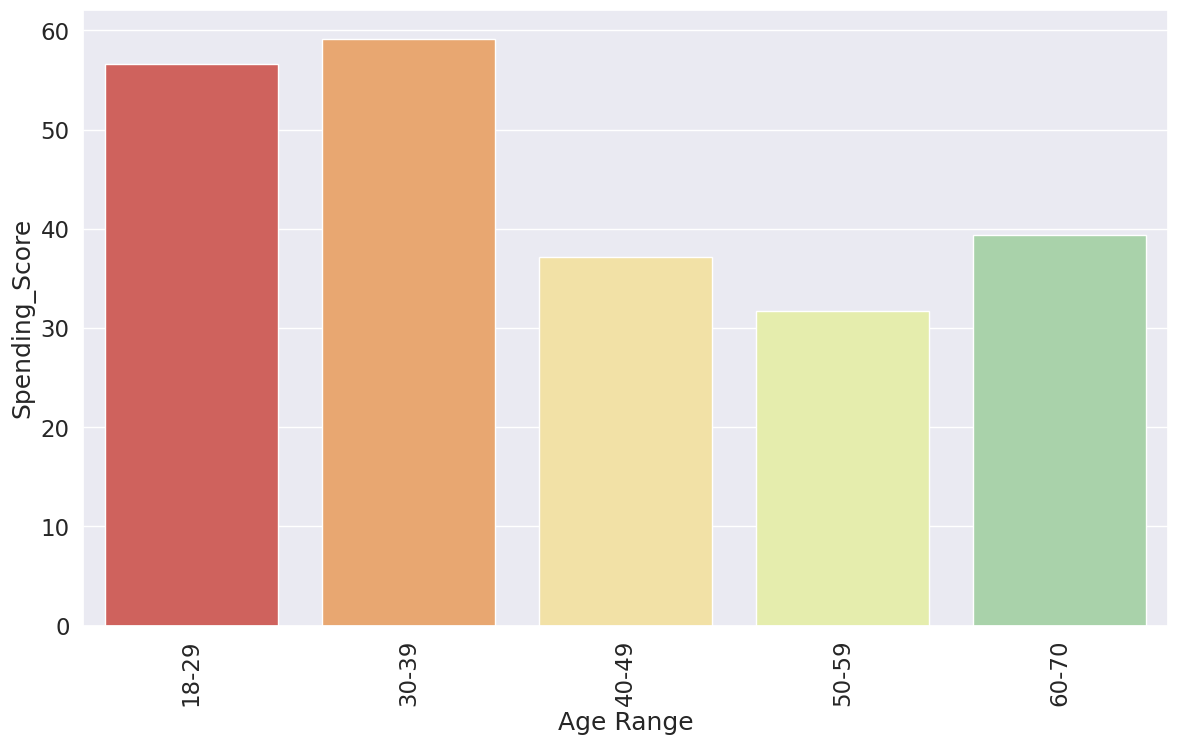

In [34]:
df_revenue1 = data[data['Genre']=='Male'].groupby(["agerange"], as_index=False)[
    "Spending_Score"
].mean()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.agerange, y=df_revenue1['Spending_Score'])
a.set_xlabel("Age Range")
a.set_ylabel("Spending_Score")
plt.show()

Observation: Male age range 20-40 has higher spending score than other age groups. So younger men spends more than older men

Men and women has almost identical spending behaviour accross age groups

## Customer segmentation based on spend behavior 
### Using KMeans clustering to segment customer

###1. Using Spending score and income as variable for clustering

In [71]:
# using only Spending_Score and income variable for easy visualisation
X = data.iloc[:, [2, 3]].values

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [73]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Plotting elbow graph

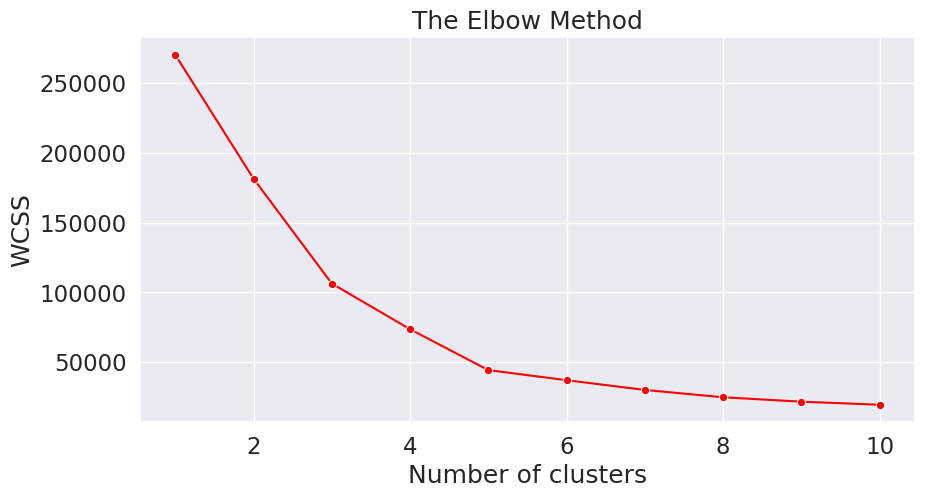

In [83]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=wcss, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Observation: From elbow method, optimal number of cluster identified is 5

In [84]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

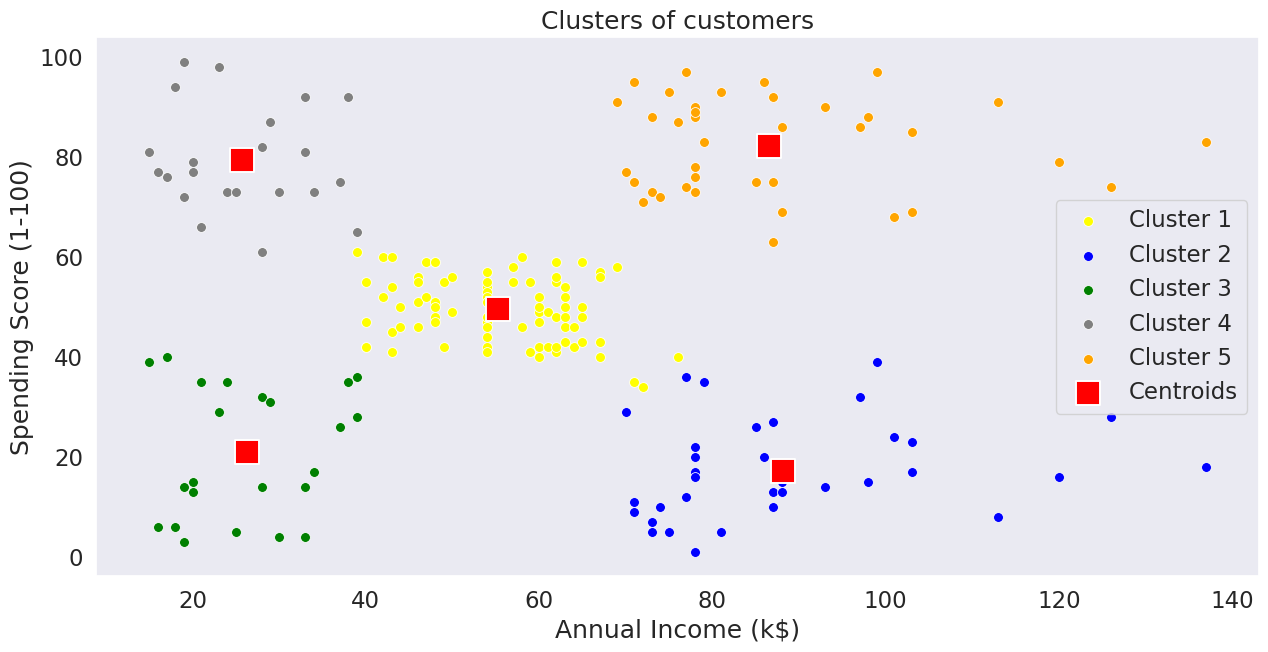

In [86]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Observation:
- This clearly segments customer based on annual income and spending score

With this segment we can define 5 different customer groups:
1. Low income low spenders
2. Low income high spenders
3. Average income average spenders
4. High income low spenders
5. High income high spenders

###2. Using Age and income as variable for clustering

In [44]:
# using only Spending_Score and income variable for easy visualisation
X = data.iloc[:, [1, 2]].values

In [45]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

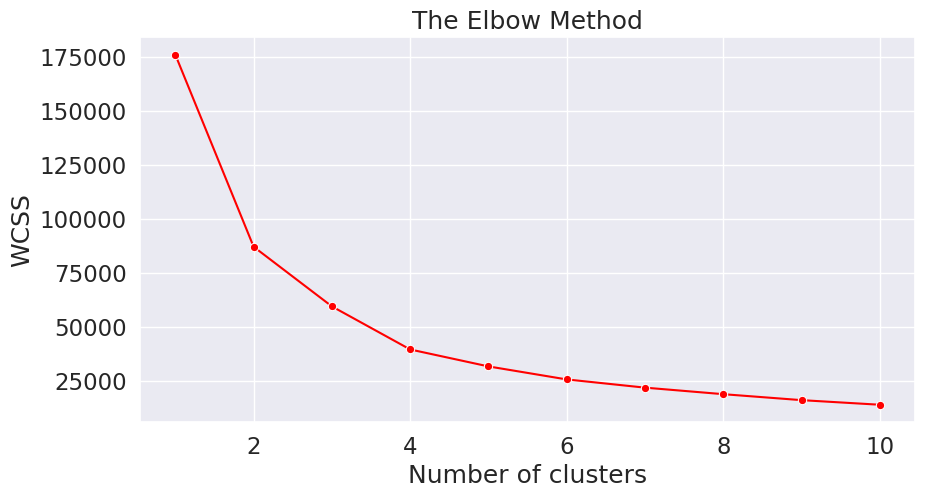

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=wcss, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

4 cluster

In [47]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

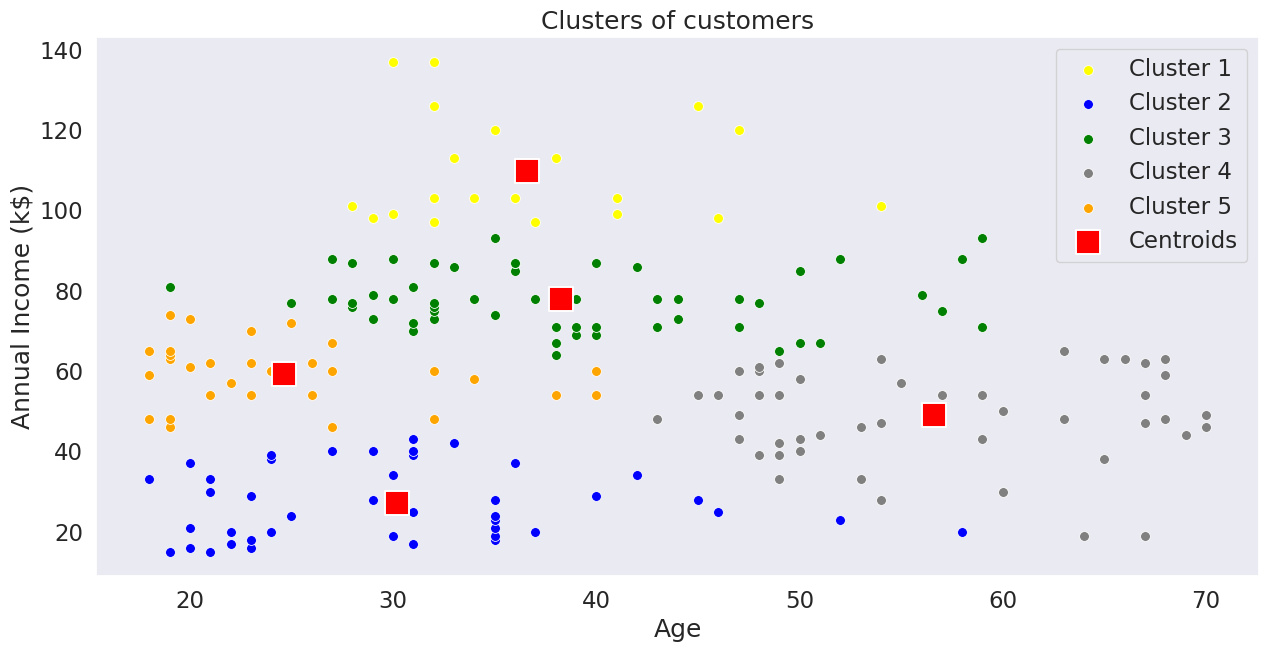

In [48]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

Segments identified here:
- Middle aged people with high annual income, they are the people in their peak career
- Old people with average and below average annual income
- Young people with average income

###3. Clustering based on Age and spending score

In [52]:
# using only Spending_Score and income variable for easy visualisation
X = data.iloc[:, [1, 3]].values

In [53]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

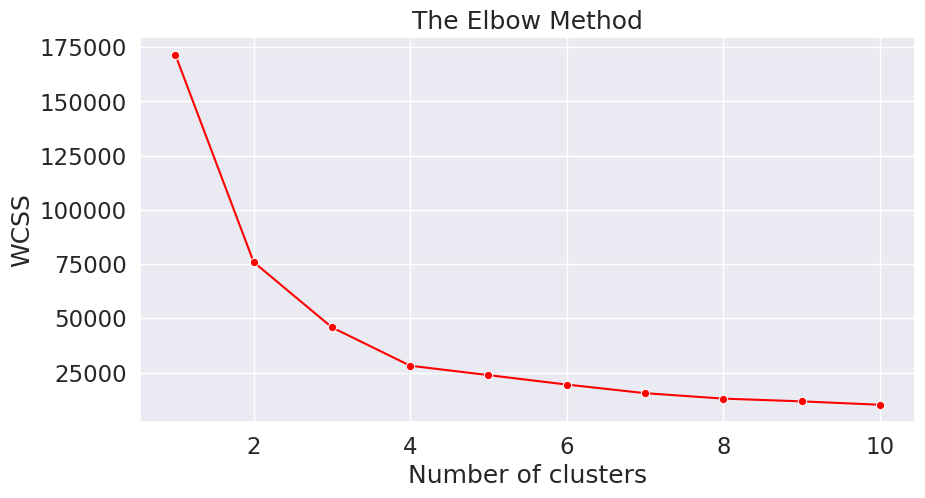

In [54]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=wcss, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

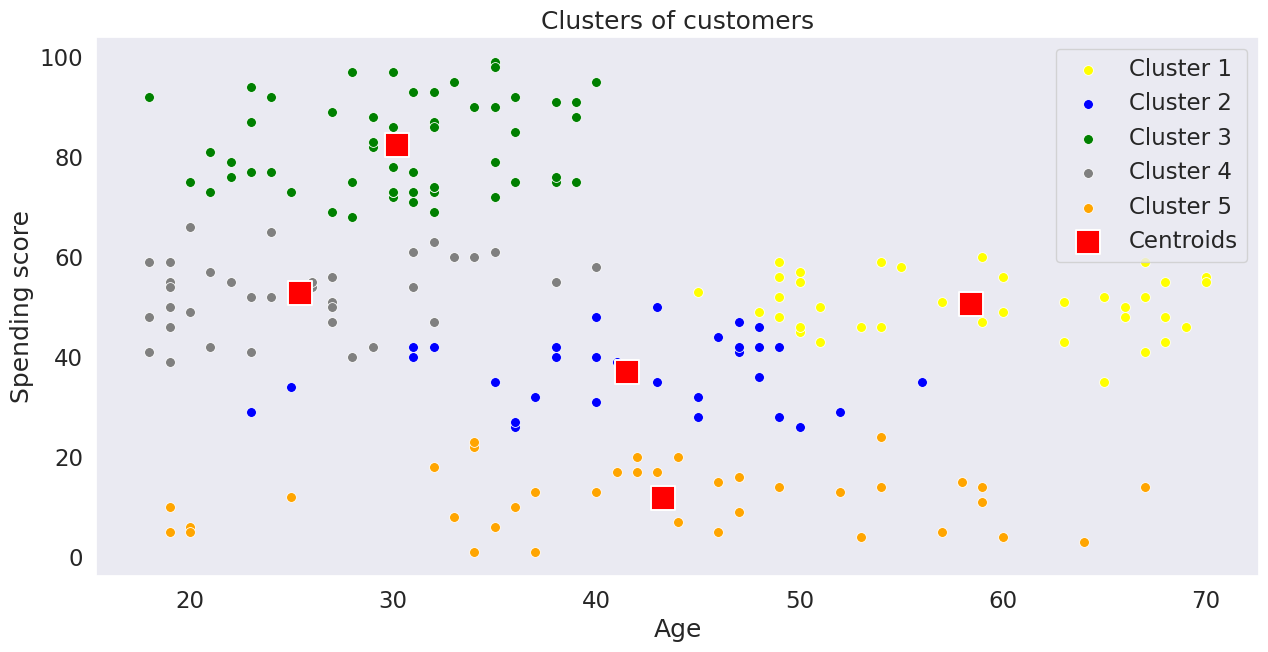

In [56]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.show()

Other than young people with high spend segments, no other segments is clearly formed here


### Segmenting Female and Male customer seperately

First Female customers

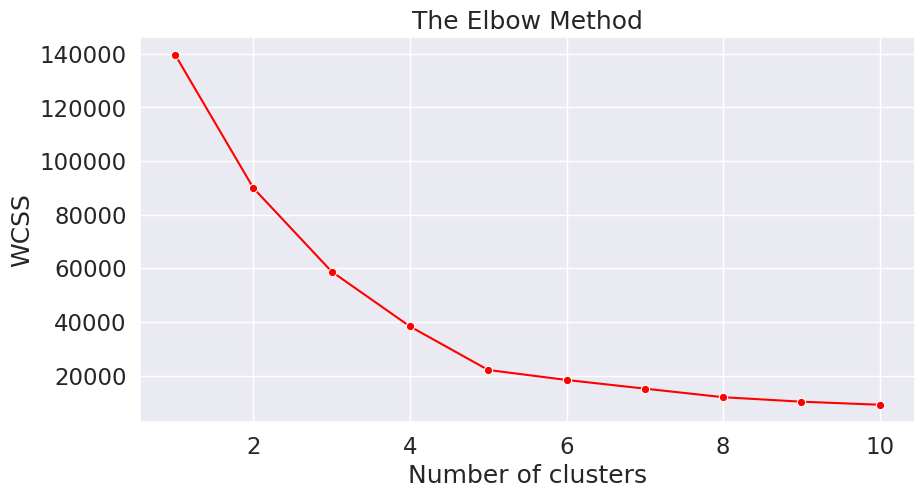

In [35]:
# using only Spending_Score and income variable for easy visualisation
X = data[data['Genre']=='Female'].iloc[:, [2, 3]].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=wcss, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

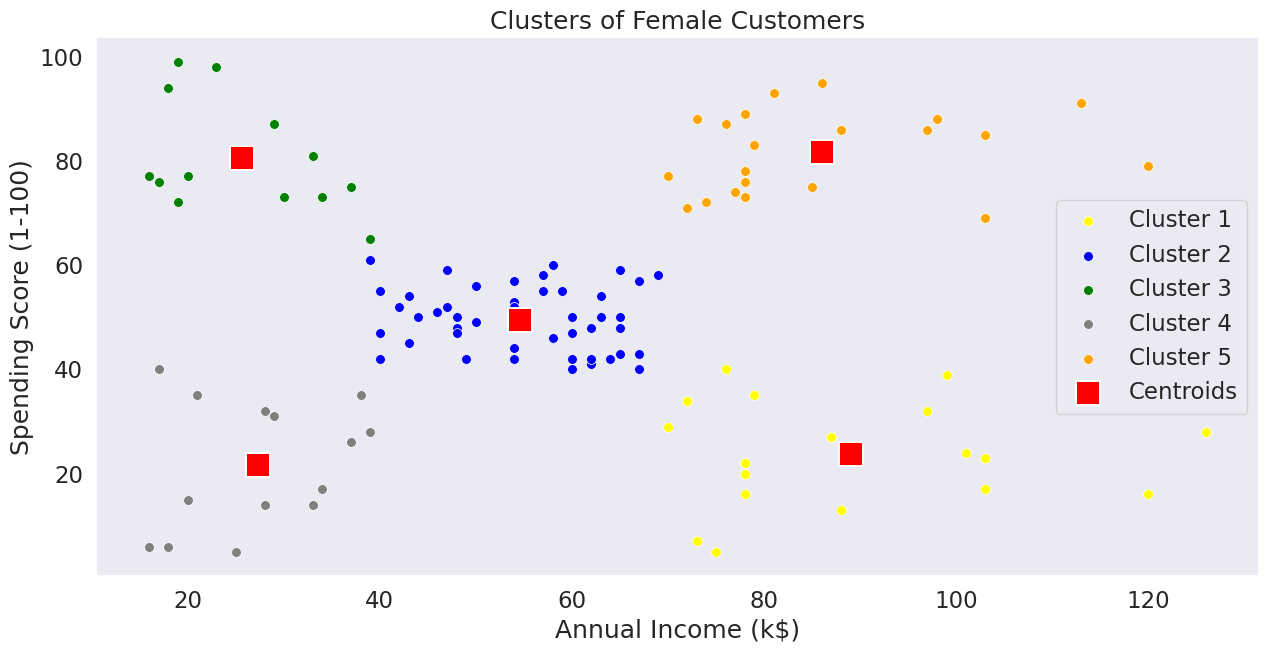

In [38]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Female Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Male Customers

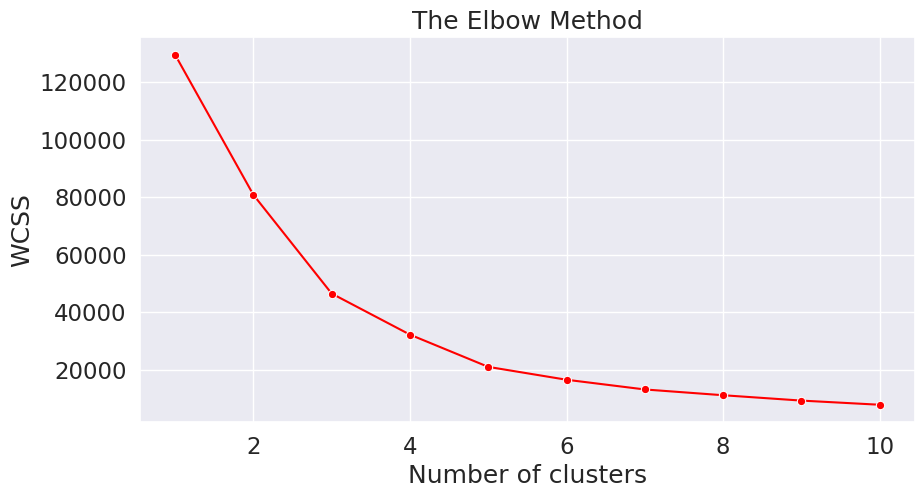

In [39]:
# using only Spending_Score and income variable for easy visualisation
X = data[data['Genre']=='Male'].iloc[:, [2, 3]].values
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=wcss, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

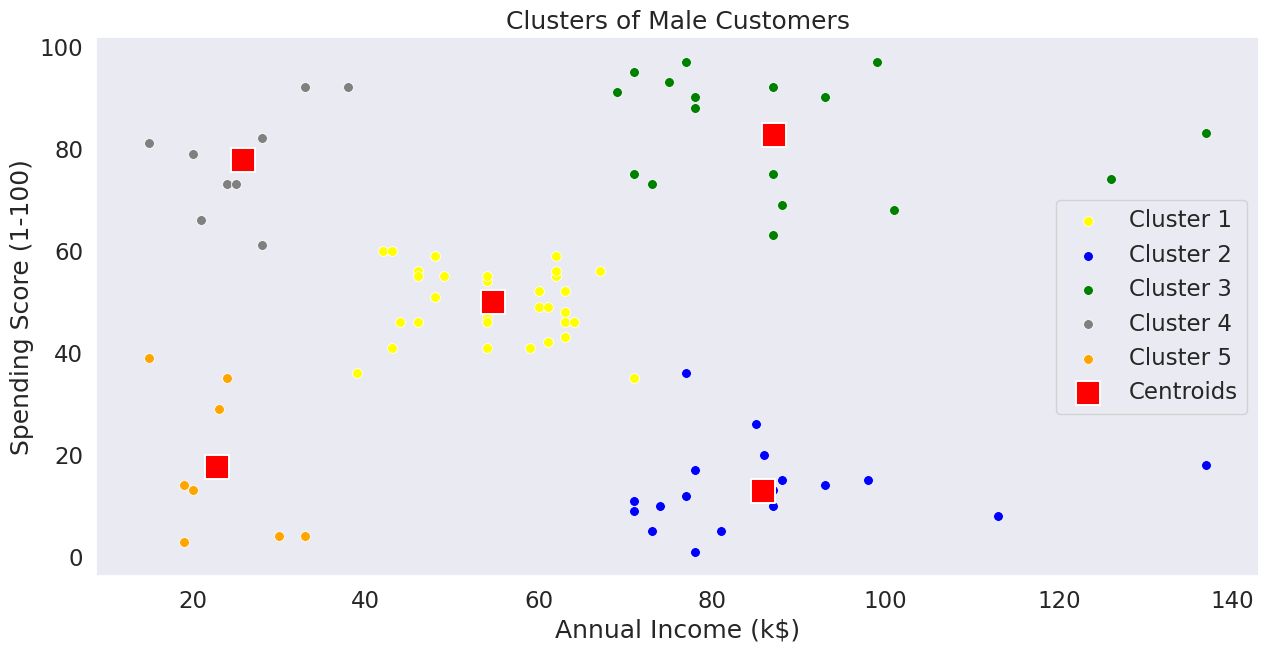

In [41]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Male Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Observation: Male and Female has identical segments based on spend behavior

### Customer spend insights

- Men and women has almost identical spending behaviour accross age groups
- Customer spend behaviour can be segmented into 5 different spend groups:
  1. Low income low spenders
  2. Low income high spenders
  3. Average income average spenders
  4. High income low spenders
  5. High income high spenders
- Shops can use this segments to do a targeted promotion or marketing
- Banks or financial institutes can use these segments to do a target sell of their products. E.g: Target credit cards or personal loans to high spenders in low and high income group



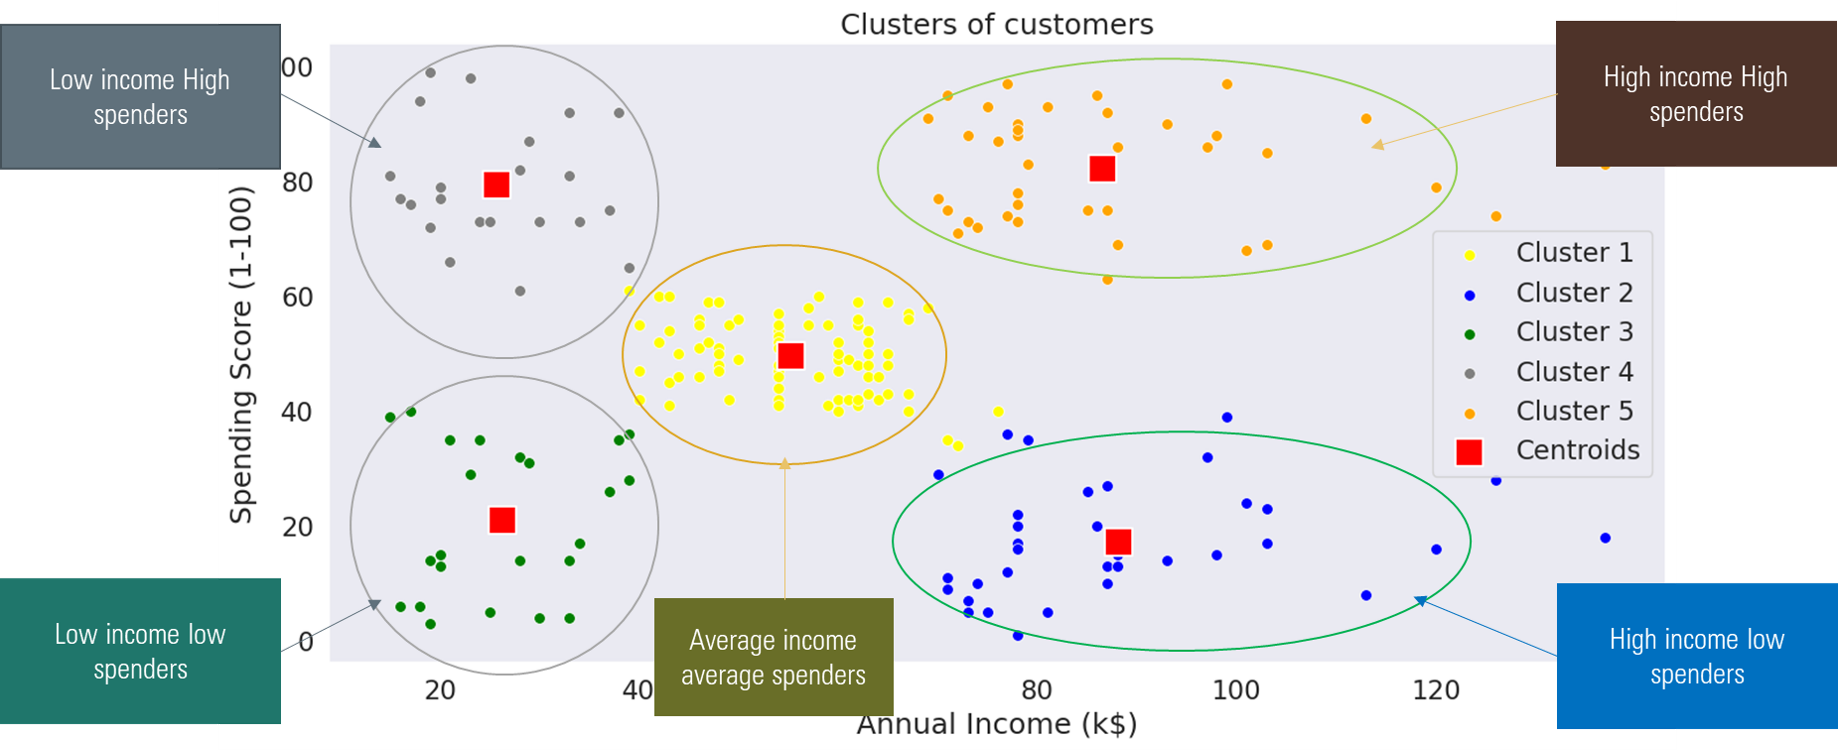

End